### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump,load

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("regionalhappy.csv")

In [3]:
df

,HappinessScore,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,Generosity,TrustGovernmentCorruption,DystopiaResidual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HappinessScore             155 non-null    float64
 1   EconomyGDPperCapita        155 non-null    float64
 2   Family                     155 non-null    float64
 3   HealthLifeExpectancy       155 non-null    float64
 4   Freedom                    155 non-null    float64
 5   Generosity                 155 non-null    float64
 6   TrustGovernmentCorruption  155 non-null    float64
 7   DystopiaResidual           155 non-null    float64
dtypes: float64(8)
memory usage: 9.8 KB


In [5]:
df.describe(include='all')

,HappinessScore,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,Generosity,TrustGovernmentCorruption,DystopiaResidual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [6]:
df.shape

(155, 8)

In [7]:
df.columns

Index(['HappinessScore', 'EconomyGDPperCapita', 'Family',
       'HealthLifeExpectancy', 'Freedom', 'Generosity',
       'TrustGovernmentCorruption', 'DystopiaResidual'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

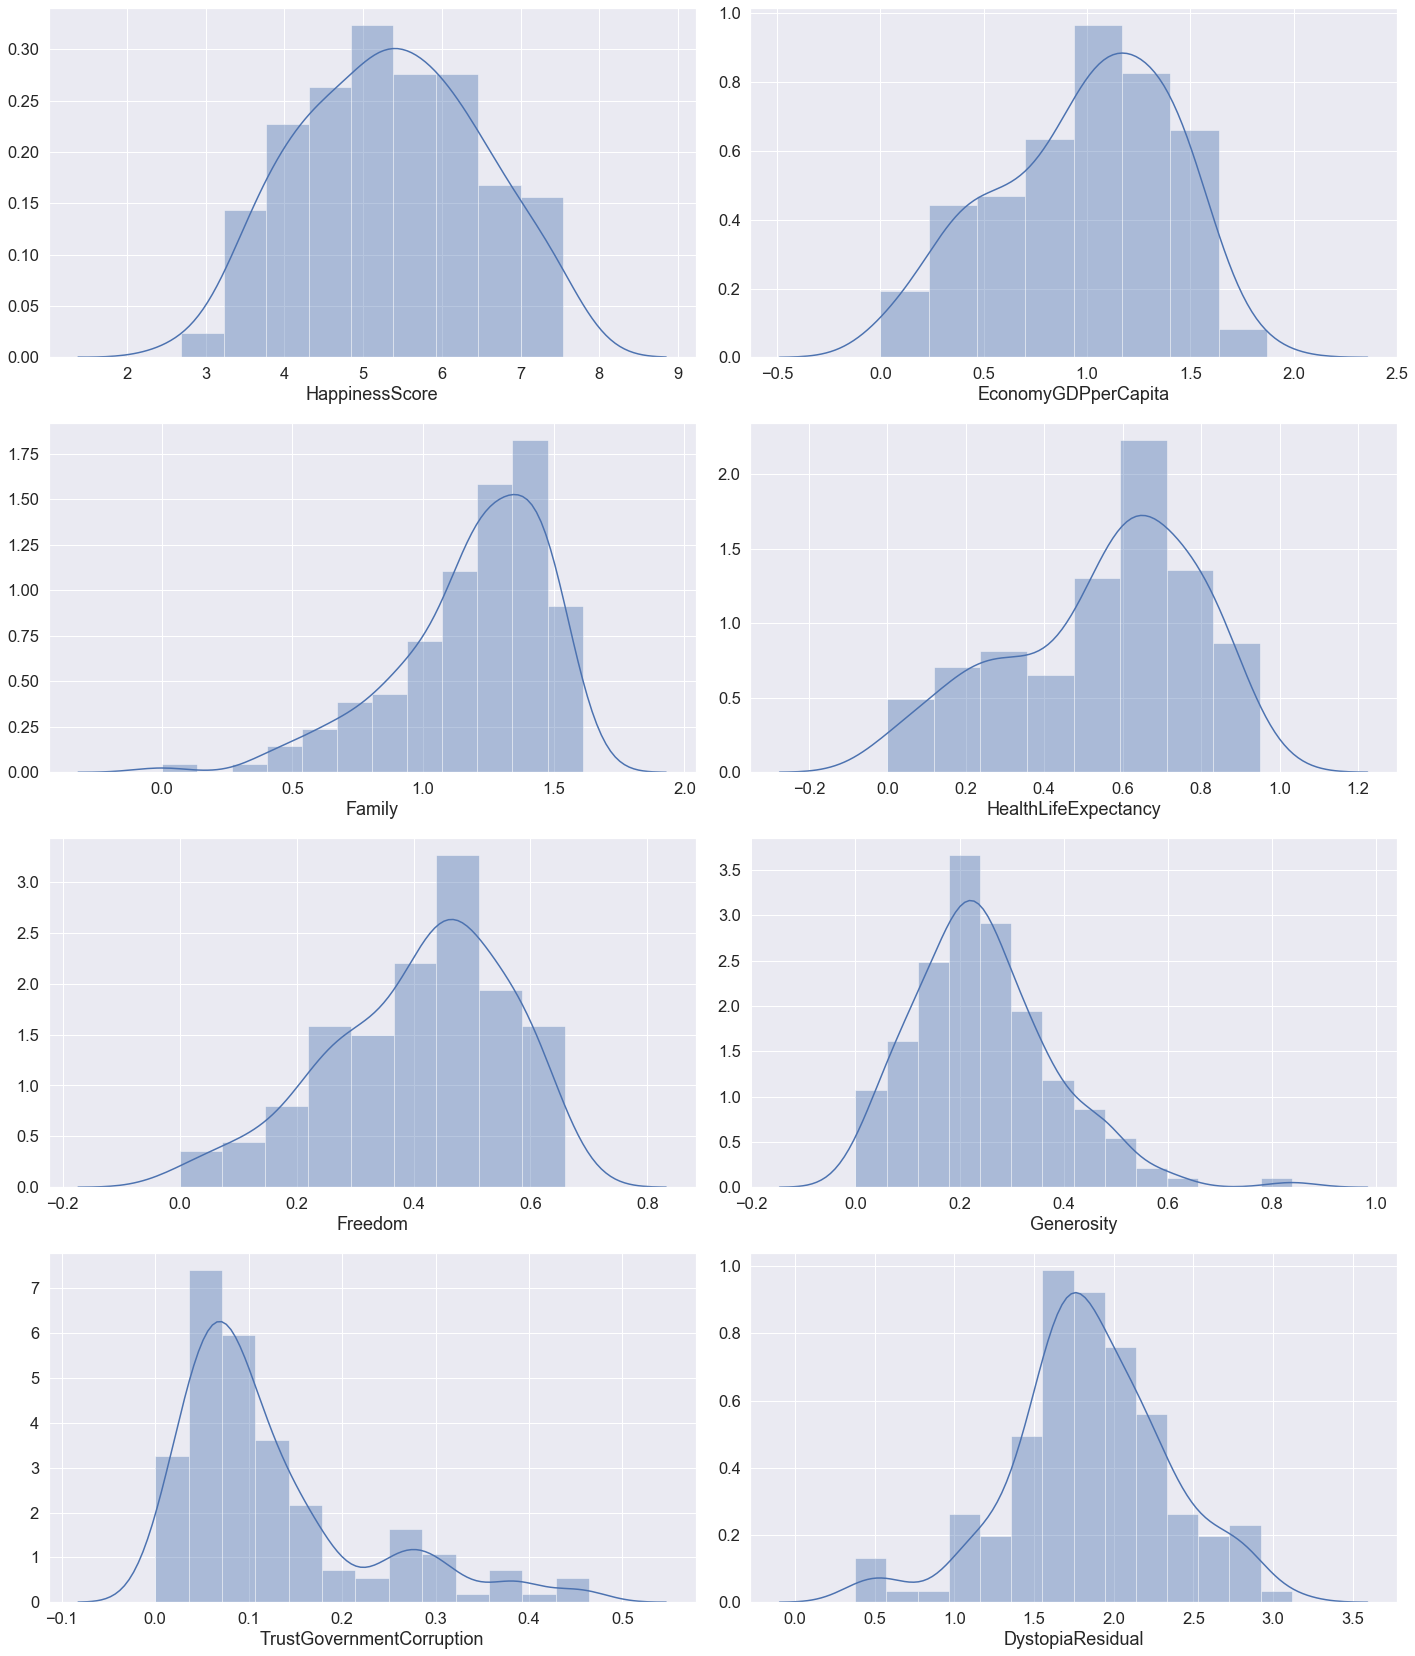

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.HappinessScore)
plt.subplot(7,2,2)
sns.distplot(df.EconomyGDPperCapita)
plt.subplot(7,2,3)
sns.distplot(df.Family)
plt.subplot(7,2,4)
sns.distplot(df.HealthLifeExpectancy)
plt.subplot(7,2,5)
sns.distplot(df.Freedom)
plt.subplot(7,2,6)
sns.distplot(df.Generosity)
plt.subplot(7,2,7)
sns.distplot(df.TrustGovernmentCorruption)
plt.subplot(7,2,8)
sns.distplot(df.DystopiaResidual)
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,HappinessScore,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,Generosity,TrustGovernmentCorruption,DystopiaResidual
HappinessScore,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
EconomyGDPperCapita,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
HealthLifeExpectancy,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
TrustGovernmentCorruption,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
DystopiaResidual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


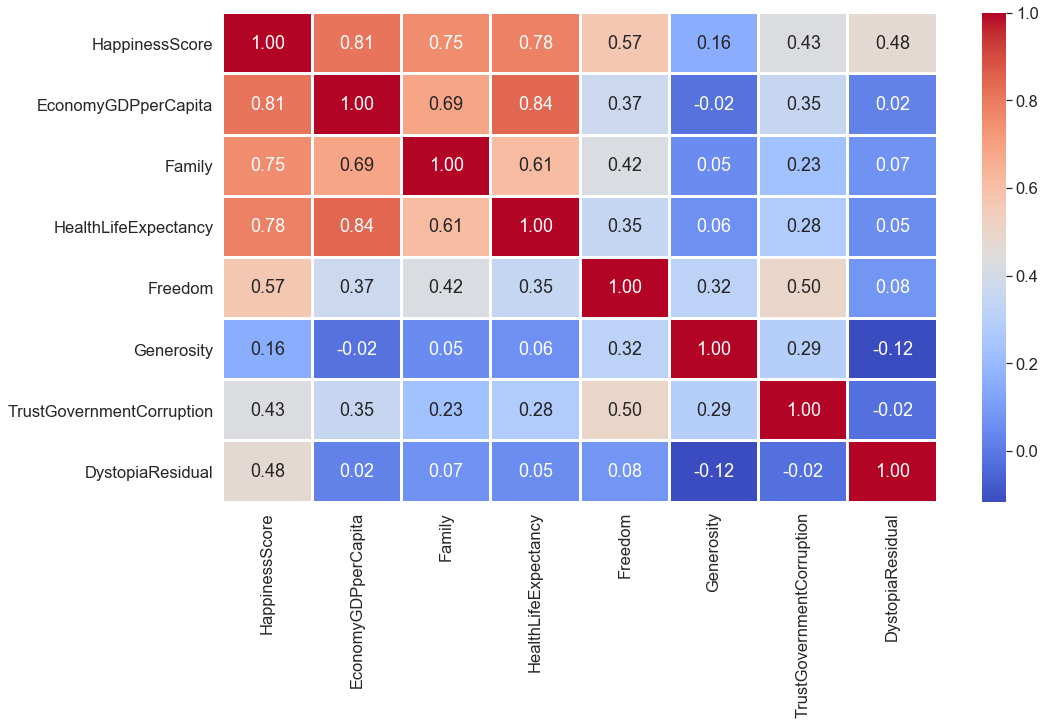

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

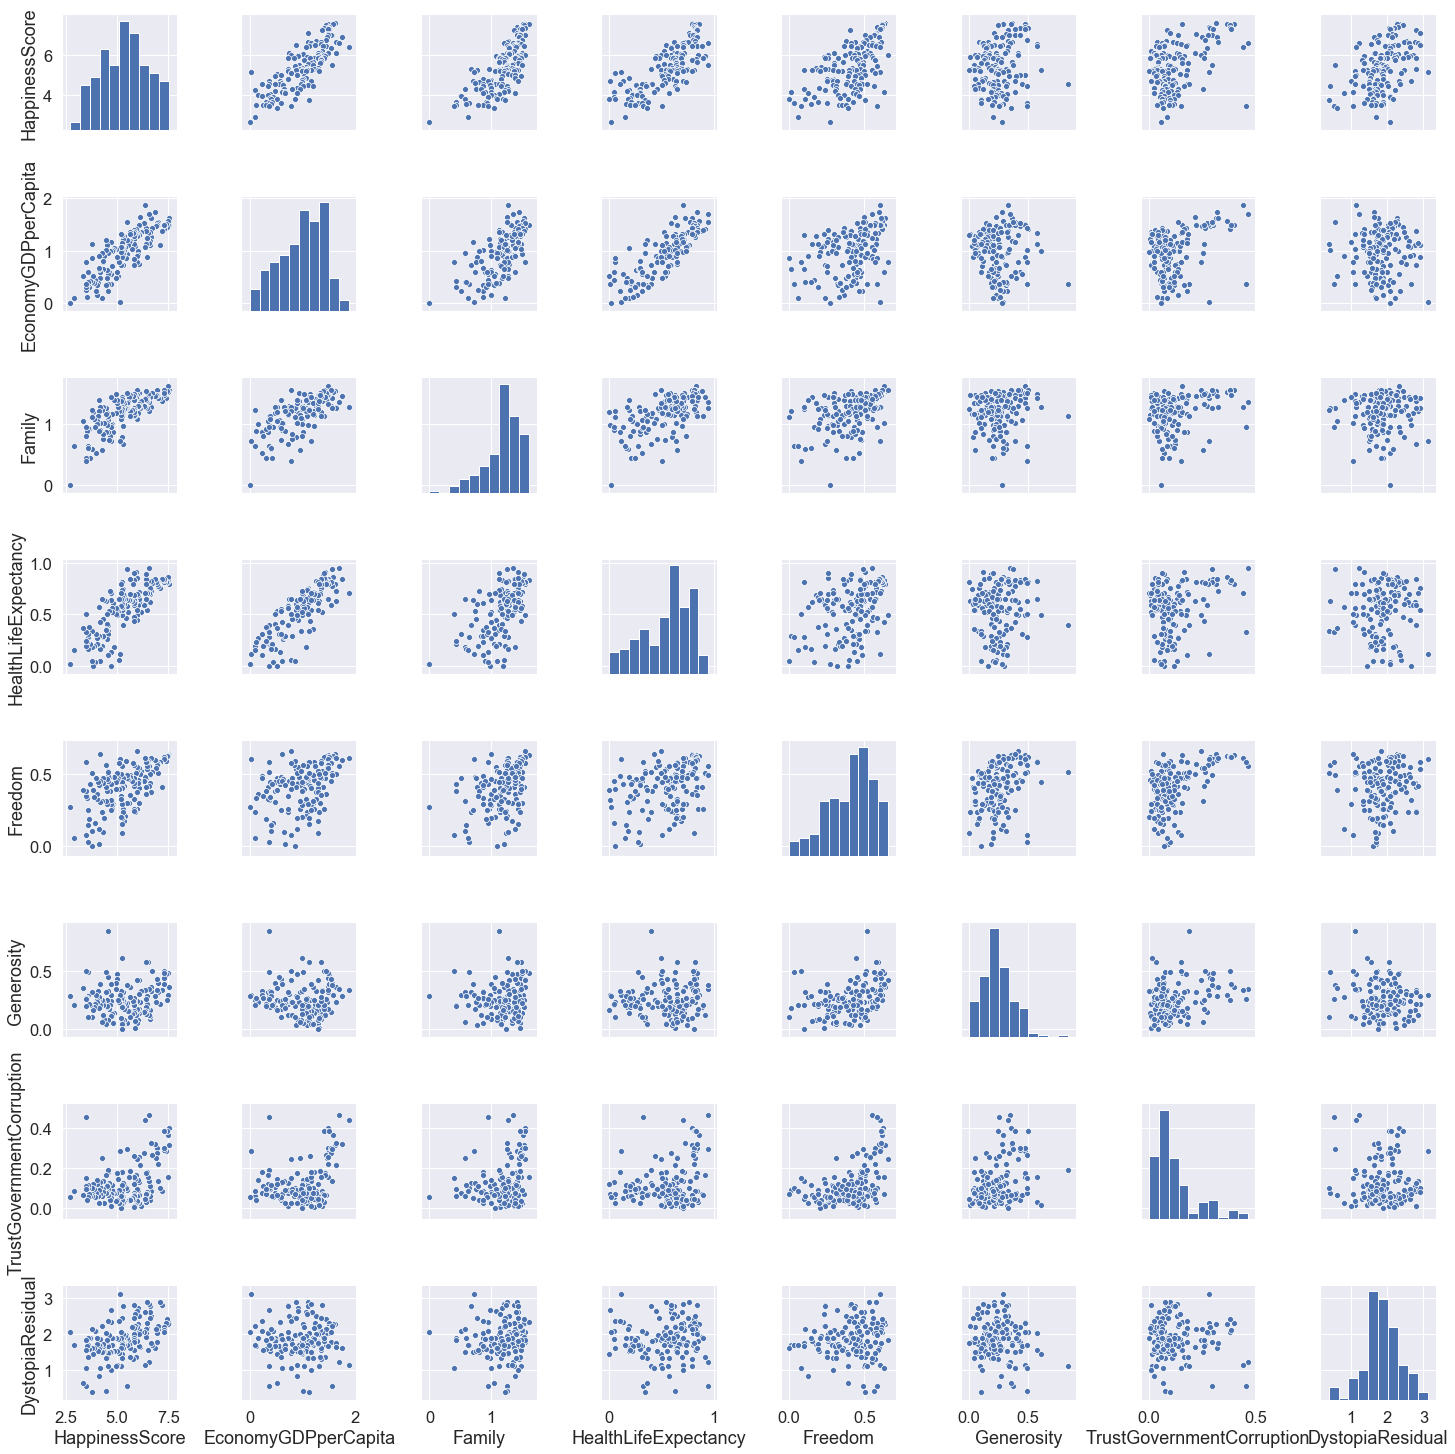

In [11]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

HappinessScore               0
EconomyGDPperCapita          0
Family                       0
HealthLifeExpectancy         0
Freedom                      0
Generosity                   0
TrustGovernmentCorruption    0
DystopiaResidual             0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

0

In [14]:
df.columns

Index(['HappinessScore', 'EconomyGDPperCapita', 'Family',
       'HealthLifeExpectancy', 'Freedom', 'Generosity',
       'TrustGovernmentCorruption', 'DystopiaResidual'],
      dtype='object')

In [15]:
df = df[['EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom', 'Generosity',
       'TrustGovernmentCorruption', 'DystopiaResidual','HappinessScore']]

### Create and save processed dataset

In [16]:
#df.to_csv("happytrain.csv",index=False)

### Train Test Split

In [17]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [18]:
X.values, y.values

(array([[1.61646318, 1.53352356, 0.7966665 , ..., 0.36201224, 0.31596384,
         2.27702665],
        [1.48238301, 1.55112159, 0.79256552, ..., 0.35528049, 0.40077007,
         2.31370735],
        [1.48063302, 1.61057401, 0.83355212, ..., 0.47554022, 0.15352656,
         2.32271528],
        ...,
        [0.51113588, 1.0419898 , 0.36450928, ..., 0.35425636, 0.06603511,
         0.62113047],
        [0.09162257, 0.62979358, 0.15161079, ..., 0.20443518, 0.08414795,
         1.68302417],
        [0.        , 0.        , 0.01877269, ..., 0.28087649, 0.05656508,
         2.06600475]]),
 array([7.53700018, 7.52199984, 7.50400019, 7.49399996, 7.46899986,
        7.37699986, 7.31599999, 7.31400013, 7.28399992, 7.28399992,
        7.21299982, 7.079     , 7.00600004, 6.99300003, 6.97700024,
        6.95100021, 6.89099979, 6.86299992, 6.71400023, 6.65199995,
        6.64799976, 6.63500023, 6.60900021, 6.59899998, 6.57800007,
        6.57200003, 6.52699995, 6.454     , 6.454     , 6.45200014,
 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 7), (31, 7), (124,), (31,))

### Model Training

### Using XGBoost (Scikit-Learn)

In [21]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=200, objective='reg:squarederror')

In [22]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:4.35281
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:3.9272
[2]	validation_0-rmse:3.54548
[3]	validation_0-rmse:3.20792
[4]	validation_0-rmse:2.90374
[5]	validation_0-rmse:2.6309
[6]	validation_0-rmse:2.39389
[7]	validation_0-rmse:2.16676
[8]	validation_0-rmse:1.95991
[9]	validation_0-rmse:1.78795
[10]	validation_0-rmse:1.62142
[11]	validation_0-rmse:1.46777
[12]	validation_0-rmse:1.33266
[13]	validation_0-rmse:1.20643
[14]	validation_0-rmse:1.10367
[15]	validation_0-rmse:1.00483
[16]	validation_0-rmse:0.91278
[17]	validation_0-rmse:0.843746
[18]	validation_0-rmse:0.773475
[19]	validation_0-rmse:0.715368
[20]	validation_0-rmse:0.656656
[21]	validation_0-rmse:0.611841
[22]	validation_0-rmse:0.570526
[23]	validation_0-rmse:0.536009
[24]	validation_0-rmse:0.503749
[25]	validation_0-rmse:0.471473
[26]	validation_0-rmse:0.448847
[27]	validation_0-rmse:0.425538
[28]	validation_0-rmse:0.402185
[29]	validation_0-rmse:0.387868
[30]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [23]:
y_pred = xgbmodel.predict(X_test)

In [24]:
y_pred

array([6.5076065, 5.274061 , 3.8970973, 4.1912417, 6.295318 , 7.239885 ,
       5.865696 , 4.5910583, 5.613874 , 4.1295166, 5.056236 , 5.1754103,
       3.7891793, 5.6155453, 4.2966337, 6.187206 , 6.4011426, 3.5587823,
       5.4317408, 4.3191094, 5.0041637, 7.2082505, 4.165553 , 3.7249813,
       6.2889304, 4.9845004, 4.4414806, 6.0765133, 5.1627154, 4.74392  ,
       6.8638287], dtype=float32)

### Model Evaluation

In [25]:
mse = mean_squared_error(y_test,y_pred)
mse

0.06785085789716166

In [26]:
rmse = np.sqrt(mse)
rmse

0.26048197230741643

In [27]:
r2score = r2_score(y_test,y_pred)
r2score

0.9480567738171

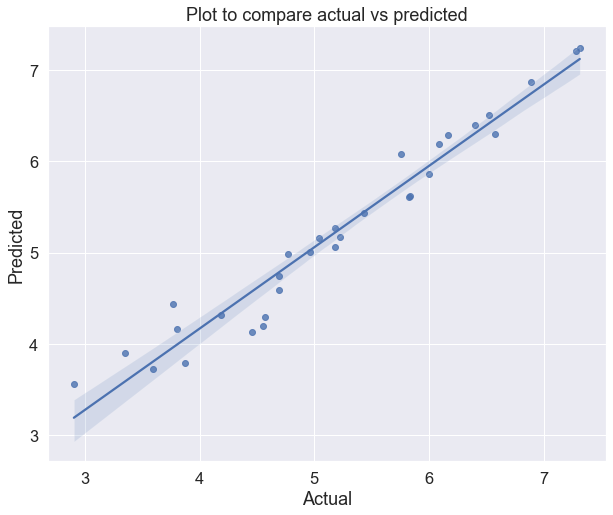

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [29]:
X.columns

Index(['EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom',
       'Generosity', 'TrustGovernmentCorruption', 'DystopiaResidual'],
      dtype='object')

In [30]:
xgbmodel.get_booster().feature_names = ['EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom',
       'Generosity', 'TrustGovernmentCorruption', 'DystopiaResidual']

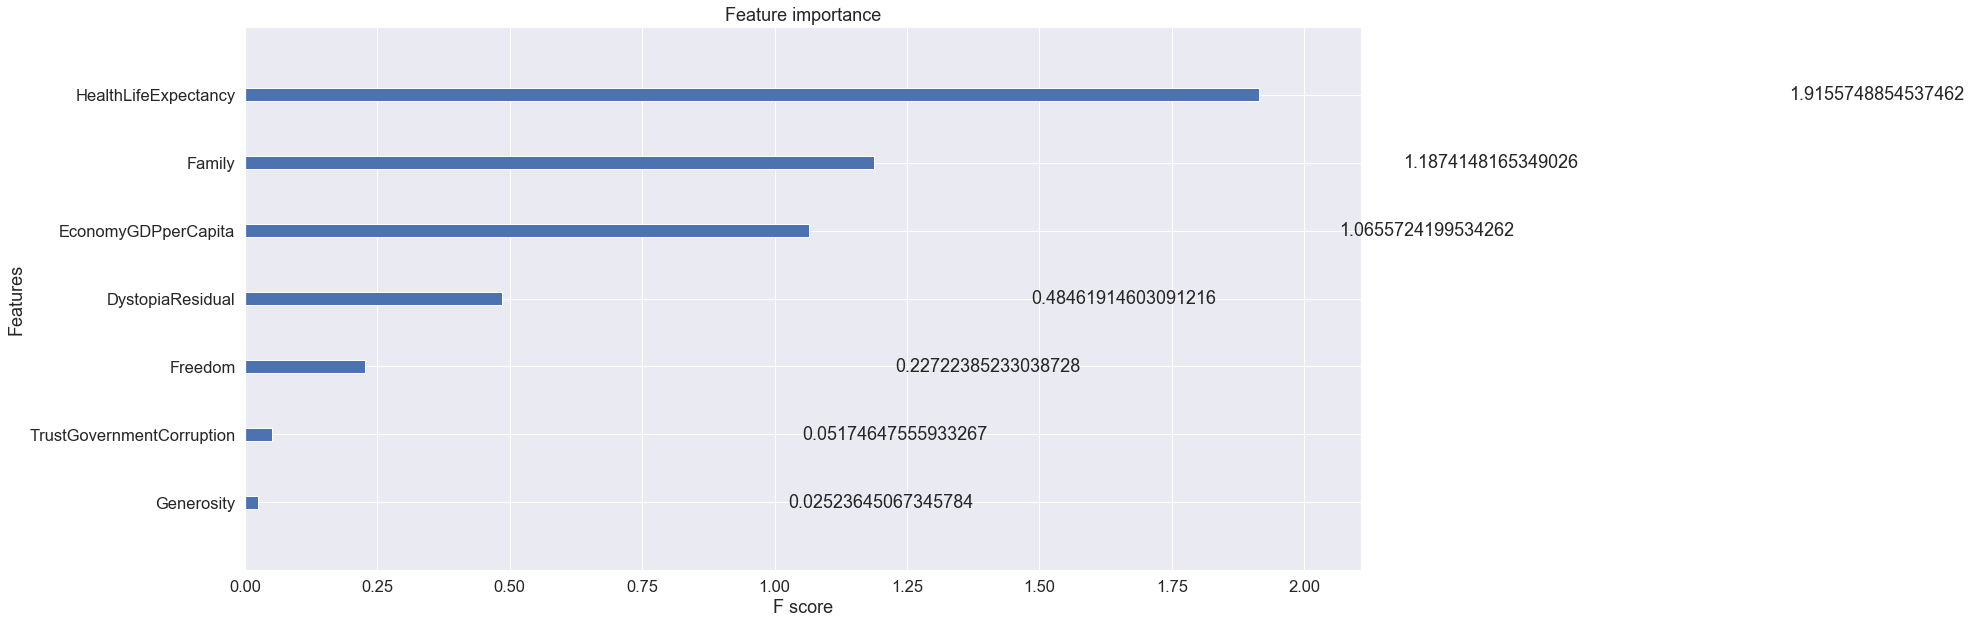

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax,importance_type='gain')
plt.show()

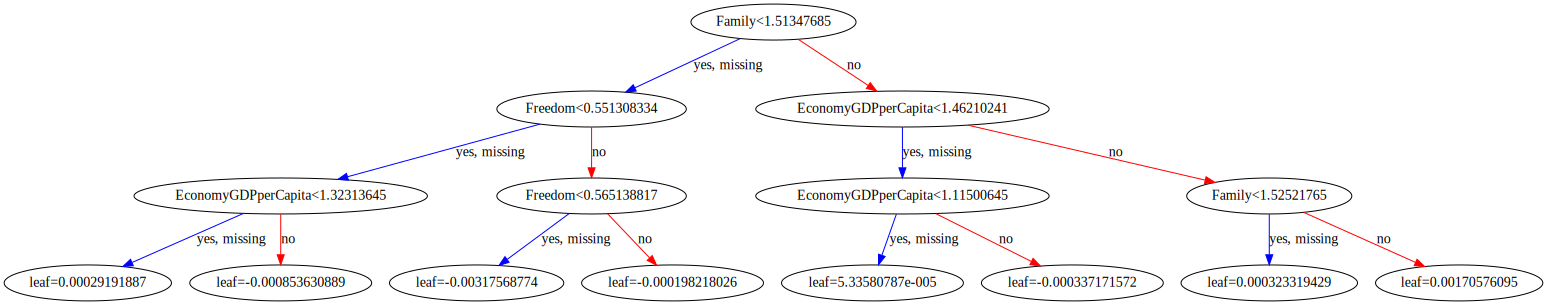

In [32]:
xgb.to_graphviz(xgbmodel,num_trees=120)

### Cross-Validation

In [33]:
cv = cross_validate(xgbmodel,X,y,cv=5,verbose=1,scoring=['r2','neg_mean_absolute_error', 'neg_mean_squared_error'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [34]:
cv

{'fit_time': array([0.07679367, 0.07080936, 0.07380152, 0.06981444, 0.0678103 ]),
 'score_time': array([0.00199676, 0.00199533, 0.00199556, 0.00199461, 0.00099707]),
 'test_r2': array([-1.34175421, -0.57793586, -4.12809177, -1.78186746, -2.88760254]),
 'test_neg_mean_absolute_error': array([-0.53991018, -0.21065461, -0.29338624, -0.35334586, -0.65647845]),
 'test_neg_mean_squared_error': array([-0.32868333, -0.06547974, -0.12803927, -0.15162346, -0.53885738])}

In [35]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### Model Tuning

### Using RandomSearchCV

In [36]:
model = XGBRegressor(random_state=0, n_estimators=200, objective='reg:squarederror')

In [37]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [38]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='r2')

In [39]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=200,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                           

In [40]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning rate=0.29, learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=3, missing=None,
             n_estimators=600, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7999999999999999, verbosity=1)

In [41]:
randm.best_score_

-1.0012654880357066

In [42]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 600,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning rate': 0.29,
 'gamma': 0,
 'colsample_bytree': 0.7}